# Chapter 6. Probability

확률:
> 사건의 공간(*universe*)에서 특정 사건(*events*)이 선택될 때 발생하는 불확실성을 수치적으로 나타내는 것이다.

주사위 던지기:
* universe - 1,2,3,4,5,6
* events - 1, 짝수

*E*에 대한 확률

In [2]:
%%latex
$$P(E)$$

<IPython.core.display.Latex object>

## Dependence and Independence

두 사건: $E$, $F$
* 종속성
> 사건 $E$의 발생 여부가 사건 $F$의 발생 여부에 대한 정보를 제공한다면

  + $F$, $E$로 바꿔도 성립
  
* 독립성; 그렇지 않다면

동전 두 번 던지기:
* 종속사건
  + 첫 번째 동전이 앞면이 나온다($E$)
  + 두 동전 모두 뒷면이 나온다($F$)
* 독립사건
  + 첫 번째 동전이 앞면이 나온다($E$)
  + 두 번째 동전이 앞면이 나온다($F$)

수학적으로, 독립적; 두 사건이 발생할 확률 == 각 사건이 발생할 확률의 곱

In [149]:
%%latex
$$P(E, F) = P(E)P(F)$$

<IPython.core.display.Latex object>

In [5]:
1/2 * 1/2 # 우린 이런 걸 잘하고 직관적으로 잘 받아 들이는 것 같습니다.

0.25

## Conditional Probability

In [19]:
%%latex
$$P(E, F) = P(E)P(F)$$

<IPython.core.display.Latex object>

The probability of $E$ "conditional on $F$"; 반드시 독립적이란 보장이 없다면(not necessarily independent) + $F$의 확률이 0이 아니라면

In [18]:
%%latex
$$P(E|F) = P(E, F)/P(F)$$

<IPython.core.display.Latex object>

In [17]:
%%latex
$$P(E, F) = P(E|F)P(F)$$

<IPython.core.display.Latex object>

*E*, *F*가 독립적이라면

In [16]:
%%latex
$$P(E|F) = P(E)$$

<IPython.core.display.Latex object>

In [15]:
%%latex
$$P(E|F)
= P(E, F)/P(F)
= P(E)P(F)/P(F)
= P(E)$$

<IPython.core.display.Latex object>

*F*가 발생함이 *E*가 발생할지에 대한 정보를 주지 않음

Tricky Example; 두 아이의 성별
가정:
1. 딸/아들일 확률은 동일
2. 첫째와 둘째의 성별은 독립적

* "no girls" - 1/4
* "one boy, one girl" - 1/2
* "two grils" - 1/4

$G$ - 첫째가 딸 / $B$ - 둘 다 딸 ... $B$ conditional on $G$?

In [14]:
%%latex
$$P(B|G)
= P(B, G)/P(G)
= P(B)/P(G)
= 1/2$$

<IPython.core.display.Latex object>

첫째가 딸이고 둘 다 딸일 확률; $P(B, G)$ == 둘 다 딸일 확률; $P(B)$ (직관적인 결과)

$L$ - 적어도 딸 하나 ... $B$ conditional on $L$?

In [5]:
%%latex
$$P(B|L)
= P(B, L)/P(L)
= P(B)/P(L)
= 1/3$$

<IPython.core.display.Latex object>

적어도 하난 딸이고 둘 다 딸일 확률; $P(B, L)$  == 둘 다 딸일 확률; $P(B)$

In [3]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(B|G):", both_girls / older_girl)
print("P(B|L):", both_girls / either_girl)

P(B|G): 0.5007089325501317
P(B|L): 0.3311897106109325


## Bayes's Theroem

"reversing" conditional probability

$E$ conditional on $F$의 확률을 알고 싶은데, $P(E|F)$       
$F$ conditional on $E$의 확률만 알고 있다. $P(F|E)$

조건부확률의 정의 두 번 사용

In [10]:
%%latex
$$P(E|F) 
= P(E, F)/P(F) 
= P(F|E)P(E)/P(F)$$

<IPython.core.display.Latex object>

*F* = (*F* and *E*) + (*F* and not *E*)  ... mutually exclusive

In [152]:
%%latex
$$
P(F)
= P(F, E) + P(F, \neg E)
= P(F|E)P(E) + P(F|\neg E)P(\neg E)
$$

<IPython.core.display.Latex object>

**Bayes's Theorem**

In [21]:
%%latex
$$
P(E|F)
= P(F|E)P(E)/[P(F|E)P(E)+P(F|\neg E)P(\neg E)]
$$

<IPython.core.display.Latex object>

1/10_000 병에 걸림   
테스트 정확도 99% (병에 걸렸을 때 양성일 확률)

$T$ - 양성    
$D$ - 병에 걸림

$T$?

In [23]:
%%latex
$$
P(D|T)
= P(T|D)P(D)/[P(T|D)P(D) + P(T|\neg D)P(\neg D)]
$$

<IPython.core.display.Latex object>

$P(D) = 0.0001$ 발병률


$P(T|D) = 0.99$ 병에 걸렸을 때 양성일 확률


$P(T|\neg D) = 0.01$ 병에 안걸렸는데 양성일 확률


$P(\neg D) = 0.9999$ 병에 안걸렸을 확률

### 옆길

In [155]:
%%latex
$$
P(T)
= P(T, D) + P(T, \neg D)
= P(T|D)P(D) + P(T|\neg D)P(\neg D)
$$

<IPython.core.display.Latex object>

In [156]:
PD = .0001
PTD = .99
PTnD = 1 - PTD
PnD = 1 - PD

In [158]:
PT = PTD*PD + PTnD*PnD
PT

0.01009800000000001

In [160]:
PDT = (PTD*PD) / (PTD*PD + PTnD*PnD)
print(f"{(PDT*100):.2f}%")
PDT

0.98%


0.009803921568627442

양성 반응을 보인 사람 중 병에 걸렸을 확률은 1%도 안된다   
(NOTE: random people)

의사는 대략 2라고 할 것이다 ?

전체: 1_000_000(1 million)    
* 병이 있을 것: 100
  + 양성: 99
* 병이 없을 것: 999_900
  + 양성: 9_999
  
양성반응 중 병에 걸린 사람 99/(99+9_999)

In [39]:
99/(99+9999)

0.00980392156862745

깊지 않은 "확률이란 무엇인가"에 대한 철학
* 동전을 한 번 던질 때 앞면이 나올 확률 - 1/2
* 동전을 열 번 던질 때 앞면이 나올 확률 - 5/10

## Random Variable

확률 분포(probability distribution)와 관계 있는 변수   

동전:
* 앞면 - 1
* 뒷면 - 0

`range(10)`에서 나온 값

각 분포는 변수 값이 나올(realizes) 확률을 의미합니다

동전:
* 앞면 - 0.5
* 뒷면 - 0.5

`range(10)`; 각각 0.1

확률 변수의 기대 값(*expected value*); 확률 가중평균 값

동전 0.5   
`range(10)`; 4.5

두 아이의 성별 가정:  
*X*; 딸의 수
* 0 - 1/4
* 1 - 1/2
* 2 - 1/4

*Y*; 최소 딸이 한 명일 때, 전체 딸의 수
* 1 - 2/3
* 2 - 1/3

*Z*; 첫째가 딸일 때, 전체 딸의 수
* 1 - 1/2
* 2 - 1/2

앞으로 *변수 =~ 확률변수*

## Continuos Distributions

이산 분포(*discrete distributions*); 이산적 결과에 대한 확률

연속적 결과에 대한 확률, 연속 분포 -> 모델

실수 결과 값만을 사용(실생활에선 아닐 수도 있다)

균등분포(*uniform distribution*); 0~1 같은 비중(*equal weight*)

pdf(*probability density function*, 확률밀도함수)   
**적분 값 == 확률**

In [44]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [45]:
def uniform_cdf(x):
    "returns the probability that a uniforn randon variable is <= x"
    if x < 0:   return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else:       return 1 # uniform random is always less than 1

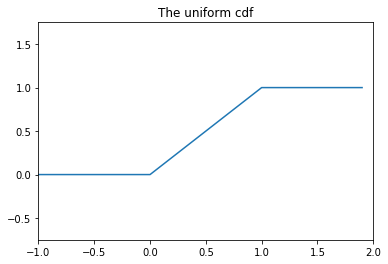

In [166]:
from matplotlib import pyplot as plt

xs = [x / 10.0 for x in range(-10, 20)]
plt.plot(xs, [uniform_cdf(x) for x in xs], '-')
plt.axis([-1, 2, -0.75, 1.75])
plt.title("The uniform cdf")
plt.show()

## The Normal Distribution

the king of distributions    
bell curve-shaped distribution   
두 개의 인자가 모양을 결정: 평균(µ), 표준편차(σ)
종(bell)의 중심(µ)과 넓이(σ) 결정

밀도 함수

In [91]:
%%latex
$$
f(x|\mu, \sigma) = {{1}\over{\sqrt{2\pi}\sigma}}\exp({-{(x-\mu)^2}\over{2\sigma^2}})
$$

<IPython.core.display.Latex object>

In [93]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

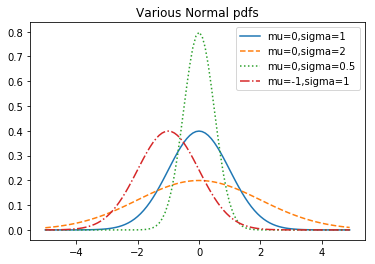

In [96]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

표준정규분포(*standard normal distribution*); µ=0, σ=1

In [97]:
%%latex
$$
X = \sigma Z + \mu
$$

<IPython.core.display.Latex object>

*X*; 평균 - µ, 표준편차 - σ 정규분포 확률변수   
*Z*; 표준정규분포 확률변수

In [99]:
%%latex
$$
Z = (X-\mu)/\sigma
$$

<IPython.core.display.Latex object>

정규분포의 누적분포함수(cdf) == [오차함수](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%B0%A8_%ED%95%A8%EC%88%98)
(`math.erf`)   

비[초등함수](https://ko.wikipedia.org/wiki/%EC%B4%88%EB%93%B1%ED%95%A8%EC%88%98)

In [100]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [132]:
%%latex
$$
\DeclareMathOperator\erf{erf}

\Phi(x)
= {1\over2}\big[1 + \erf\big({{(x - \mu)}\over{\sqrt2 \sigma}}\big)\big]
$$

<IPython.core.display.Latex object>

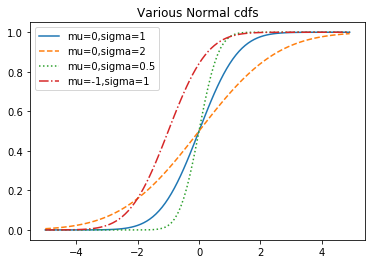

In [131]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

특정 확률의 확률변수를 구하기 위해 `normal_cdf`의 역함수를 구해야한다.   
역함수를 구하는건 어렵지만, `normal_cdf` 연속 우상향 함수이다(정렬되어 있다) - 이진 탐색을 사용한다.   

In [133]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0         # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p   =  10.0, 1         # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too slow, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

## The Central Limit Theroem

정규분포를 공부한 이유..?   
동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다.    
> a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.


???    

확률변수, 독립적이고 큰 개수의 평균  
같은 분포의 확률변수 정규분포 되어 있다

확률변수; $x_1, ..., x_n$, 평균 - $\mu$, 표준편차 - $\sigma$   
그리고 $n$이 충분히 크다면

In [140]:
%%latex
$$
{1\over n}(x_1 + ... + x_n)
$$

<IPython.core.display.Latex object>

평균 $\mu$, 표준편차 $\sigma/\sqrt n$ 인 정규분포와 *비슷*

In [141]:
%%latex
$$
(x_1 + ... + x_n)-\mu n\over\sigma\sqrt n
$$

<IPython.core.display.Latex object>

평균 0, 표준편차 1 인 정규분포와 *비슷*

이항 확률변수(*binomial random variable*)   
두 개의 인자; $n$과 $p$    
Binomial(n, p) == n개의 독립적인 [Bernoulli(p)](https://ko.wikipedia.org/wiki/%EB%B2%A0%EB%A5%B4%EB%88%84%EC%9D%B4_%EC%8B%9C%ED%96%89)의 합

베르누이 확률변수(Bermoulli random variable):
* $p$ - 1
* $1-p$ - 0

In [143]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

Bernoulli(p); 평균 $p$, 표준편차 $\sqrt{p(1-p)}$

중심극한정리에 따르면; $n$이 적당히 크다면   
Binomial(n, p); 평균 $np$, 표준편차 $\sqrt{np(1-p)}$

In [144]:
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actial bionomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)\
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

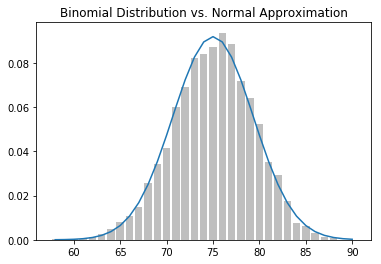

In [145]:
make_hist(0.75, 100, 10000)

동전을 100번 던져, 60번 이상이 앞면 나오는 확률

In [177]:
for _ in range(10000):
    print(binomial(100, .5))

54
48
54
44
54
45
52
54
46
52
42
45
45
53
50
47
47
47
65
41
56
48
51
58
52
52
45
50
45
48
55
46
44
41
55
50
52
53
53
46
52
48
50
36
48
53
57
53
51
54
58
54
50
47
57
45
53
48
51
52
47
56
43
52
44
53
49
40
46
43
39
37
47
51
48
53
60
50
51
53
44
48
55
48
47
46
53
45
52
41
56
48
45
62
44
59
49
52
49
53
50
47
55
50
53
52
50
53
53
48
51
49
54
52
54
47
51
48
55
48
40
43
58
54
48
47
56
50
54
45
53
52
54
55
51
36
55
52
53
50
49
43
47
45
51
46
48
49
57
48
52
56
47
46
48
45
44
52
50
46
50
54
55
48
42
56
54
53
45
47
47
52
52
50
47
50
60
52
41
43
39
60
48
58
46
43
39
56
38
45
49
52
48
43
56
52
54
54
41
45
51
45
61
49
47
54
45
47
53
56
45
66
51
47
51
52
47
53
44
52
52
55
52
54
54
56
53
56
43
49
50
41
51
45
49
54
48
57
38
55
57
50
44
49
49
47
50
47
58
46
50
55
54
56
55
47
42
45
51
44
49
55
51
47
55
45
50
45
48
52
44
55
56
46
57
61
47
49
42
47
52
49
49
58
54
46
48
57
49
54
45
61
56
50
45
50
46
39
56
45
55
52
44
47
57
51
58
56
50
44
50
48
51
57
47
48
57
53
45
49
44
39
54
48
42
42
46
46
49
63
50
41
44
5

42
51
50
49
53
55
57
48
51
50
48
48
48
51
48
56
49
50
46
49
51
47
57
49
48
54
48
51
49
50
45
46
54
51
53
48
52
46
50
51
45
54
55
51
52
43
60
47
52
51
45
51
49
46
49
60
48
46
51
42
51
58
46
35
46
48
53
43
46
51
51
55
52
53
54
47
52
53
53
38
47
56
53
53
51
48
49
57
41
53
44
47
44
54
53
48
51
53
48
51
57
52
52
40
47
48
51
52
53
51
46
49
51
60
61
48
52
50
54
45
55
53
41
54
51
44
61
54
48
61
57
52
58
53
55
56
51
56
41
47
46
51
47
49
42
53
42
55
45
54
46
49
52
52
46
55
58
51
55
43
48
53
60
55
64
49
43
52
51
48
60
53
37
54
49
45
57
45
62
48
55
47
46
52
47
55
51
40
58
52
61
57
45
46
49
51
52
46
48
51
53
48
52
50
52
49
49
40
51
55
47
55
50
48
54
50
49
52
49
50
49
54
46
46
47
46
50
50
56
53
51
51
53
51
58
47
52
48
44
54
43
44
48
52
48
58
55
60
49
54
53
53
42
54
40
53
53
54
53
46
58
54
50
45
49
49
44
50
48
52
47
51
53
50
50
49
47
51
52
41
59
43
49
40
40
52
54
48
46
50
54
50
50
45
58
49
56
45
55
51
49
55
53
47
49
59
51
42
40
55
53
45
56
52
53
62
50
51
58
55
38
57
45
53
54
57
42
48
50
56
57
58
43
4

52
49
51
43
53
54
33
54
51
59
53
52
46
50
58
52
50
56
49
53
42
58
54
55
51
56
49
60
48
48
53
46
45
57
51
56
54
55
49
42
57
44
52
54
54
49
48
54
40
54
51
52
47
49
45
51
57
57
53
47
47
55
45
49
48
52
54
47
54
47
52
53
52
47
52
49
43
51
57
49
45
48
44
52
42
40
45
51
47
53
42
48
48
49
48
43
45
55
50
42
48
40
60
55
52
52
45
43
52
45
53
48
57
61
53
41
46
54
55
50
55
41
44
55
63
58
47
55
53
42
57
50
49
49
48
49
43
54
53
51
58
50
41
54
48
48
43
53
51
49
54
49
50
51
47
47
48
53
52
60
42
51
43
48
45
54
50
47
54
53
50
52
44
52
44
50
53
48
46
46
46
61
55
48
51
55
58
43
43
46
44
50
50
49
45
45
43
57
48
50
45
48
52
52
44
49
52
48
52
48
41
45
50
50
51
48
43
58
48
49
51
49
52
50
51
53
49
49
56
53
54
60
42
57
45
52
50
52
53
49
55
58
45
57
48
51
47
51
50
49
56
52
52
39
50
46
54
50
56
48
47
56
45
47
54
48
48
55
49
47
50
56
56
56
60
50
51
57
52
55
50
51
46
40
47
53
44
50
41
52
50
56
40
52
46
54
52
42
48
64
51
48
50
52
55
49
42
51
45
47
46
49
50
47
55
48
65
51
48
53
46
54
51
44
52
54
46
50
48
50
48
58
51
4

51
49
54
58
55
52
59
51
52
48
56
49
47
59
44
58
58
52
50
47
54
53
46
50
52
52
51
48
54
41
51
49
55
52
44
50
53
45
54
45
58
46
48
48
40
51
44
50
54
51
54
52
57
54
43
45
53
45
55
45
51
52
34
50
51
44
45
49
59
45
52
48
49
47
53
44
50
48
48
52
44
41
44
51
47
52
57
48
46
50
55
45
51
49
57
57
49
52
55
53
51
53
47
47
54
49
54
55
48
46
52
50
53
56
46
55
50
47
50
52
52
45
45
54
56
44
40
46
51
57
52
46
55
53
52
47
50
47
49
41
59
46
55
45
53
54
50
54
50
49
55
56
50
50
55
52
56
58
49
50
46
58
47
51
53
41
47
50
53
37
50
44
52
47
48
45
50
52
42
51
49
52
49
50
51
53
60
52
45
49
44
45
53
57
55
41
50
53
51
47
49
55
57
48
58
58
40
60
52
50
48
61
42
50
51
55
65
58
60
50
55
48
42
39
46
53
55
42
55
51
49
50
49
56
52
60
59
58
51
49
56
42
53
38
52
50
48
51
38
50
40
52
50
51
52
53
49
48
50
56
50
62
49
44
52
59
43
46
50
49
48
47
52
58
55
46
52
45
49
51
44
47
57
46
47
45
55
53
55
50
45
49
47
50
58
50
61
48
52
45
50
47
57
58
54
51
51
56
51
62
56
50
47
55
63
50
47
49
60
50
45
56
44
46
51
52
49
46
51
46


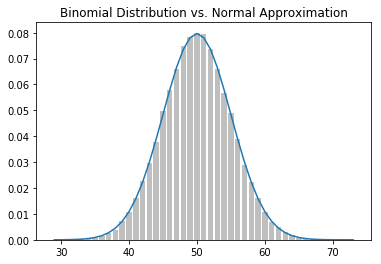

In [175]:
make_hist(0.5, 100, 100000)